# Thông tin Sinh viên
## Nhóm: 
### Trương Thị Kim Thoa - 19522295
### Trần Hồ Thiên Phước - 19522057
### Nguyễn Việt Thư - 19522309
## Đề tài: K - Nearest Neighbors(KNN)
## Giảng viên hướng dẫn: Thầy Nguyễn Vinh Tiệp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/CS116/bank-additional-full.csv'

# Step 1: Import Library

In [ ]:
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd 
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

# Step 2: Read Data

In [ ]:
df = pd.read_csv(path, delimiter=";" )
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Let's do some statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Step 3: Checking For Categorical Columns

In [ ]:
for col in df.columns:
    print()
    if df[col].dtype == 'object':
        print(f'Name of Column is: {col} and unique values are: {df[col].unique()}')



Name of Column is: job and unique values are: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Name of Column is: marital and unique values are: ['married' 'single' 'divorced' 'unknown']

Name of Column is: education and unique values are: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Name of Column is: default and unique values are: ['no' 'unknown' 'yes']

Name of Column is: housing and unique values are: ['no' 'yes' 'unknown']

Name of Column is: loan and unique values are: ['no' 'yes' 'unknown']

Name of Column is: contact and unique values are: ['telephone' 'cellular']

Name of Column is: month and unique values are: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Name of Column is: day_of_week and unique values are: ['mon' 'tue' 'wed' 'thu' 'fri']





Name of Column is: poutcome and unique valu

# Step 4: Utility Functions

In [ ]:
#this function returns categorical variables
def return_categorical(df):
  categorical_columns = [column_name for column_name in df if df[column_name].dtype == 'O']
  return categorical_columns

#this function returns numerical variables
def return_numerical(df):
  return list(set(df.columns) - set(return_categorical(df)))

def check_normal(df):
  fig, axes = plt.subplots(1,len(return_numerical(df)), figsize =(70, 10))
  for i,numeric_column_name in enumerate(list(set(df.columns) -set(return_categorical(df)))):
    sns.distplot(df[numeric_column_name], ax=axes[i]);
    plt.title(f'Distribution of {numeric_column_name}');
    

In [ ]:
def classifier(clf, x_train,x_test,y_train,y_test):
    y_test_pred = clf.predict(x_test)
    y_train_pred = clf.predict(x_train)

    accuracy_test = accuracy_score(y_test,y_test_pred)
    accuracy_train =  accuracy_score(y_train,y_train_pred)

    roc_test = roc_auc_score(y_test, y_test_pred, multi_class='ovr')
    roc_train = roc_auc_score(y_train, y_train_pred, multi_class='ovr')

    print('Train accuracy is:',accuracy_train )
    print('Test accuracy is:',accuracy_test )
    print()
    print('Train ROC is:', roc_train)
    print('Test ROC is:',roc_test )

    # Fscore, precision and recall on test data
    f1 = f1_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred) 
    print()
    print("F score is:",f1 )
    print("Precision is:",precision)
    print("Recall is:", recall)

In [ ]:
def grid_search(clf,params, x_train,x_test,y_train,y_test):
    
    grid = GridSearchCV(clf, params)
    grid.fit(x_train, y_train)
    optimal_model = grid.best_estimator_

    print("Best parameters are: ", grid.best_params_)
    print()
    print("Best estimator is: ", grid.best_estimator_)
    print()
    print('Scores and accuracies are:')
    print()
    classifier(optimal_model, x_train,x_test,y_train,y_test)

# Step 5: Data PreProcessing And Visualizations

## Checking Distribution For Continuous Variables

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

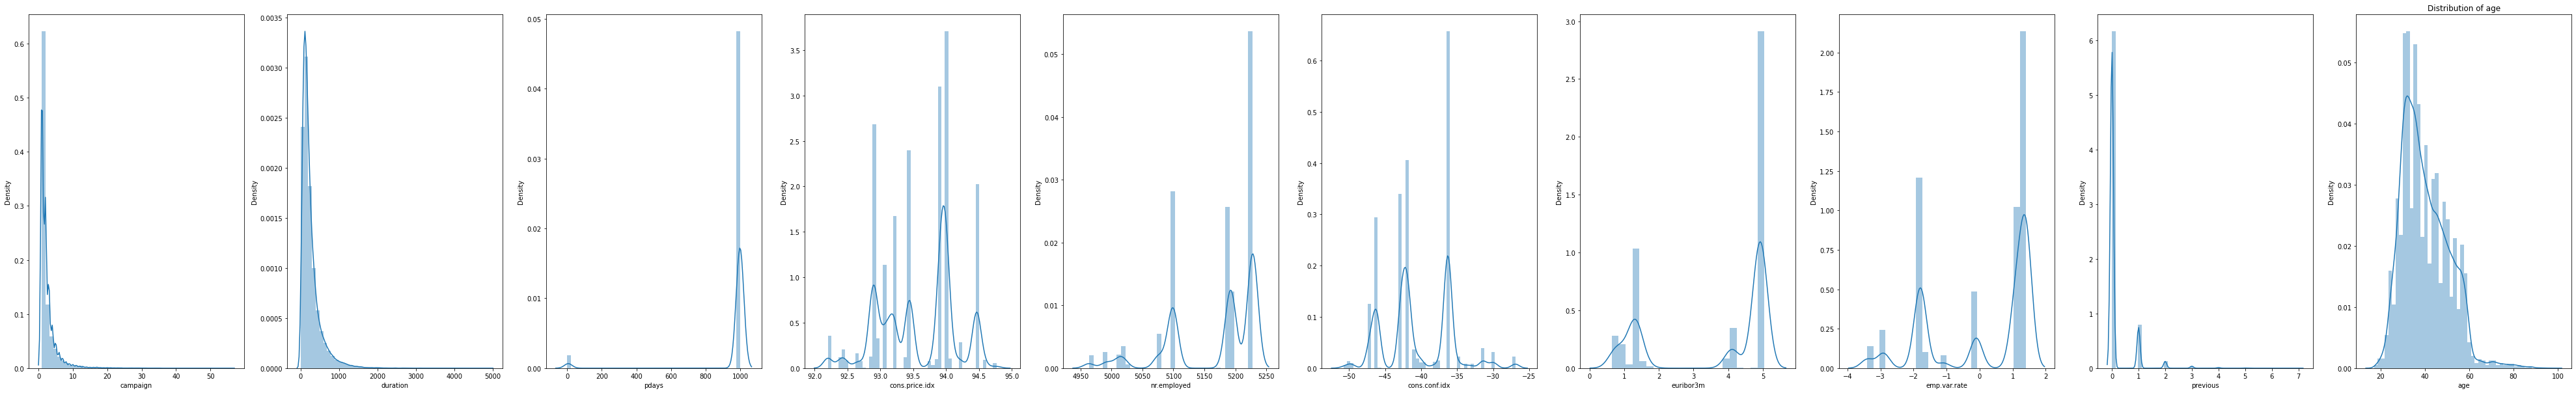

In [ ]:
check_normal(df)

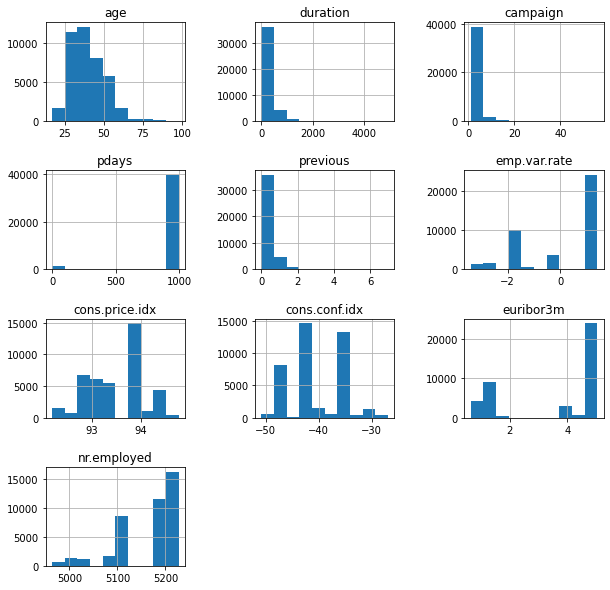

In [ ]:
header = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
df.hist(column=header,figsize=(10,10))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

## Plots For Categorical Variables

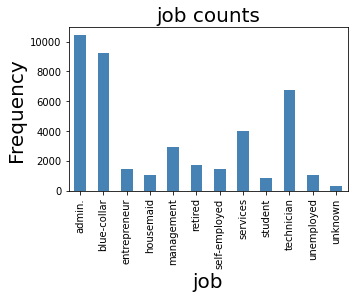

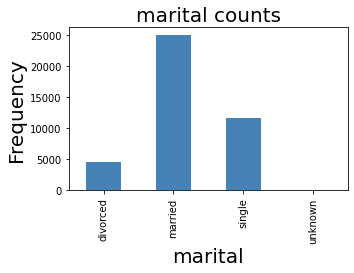

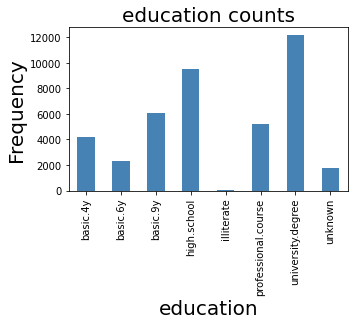

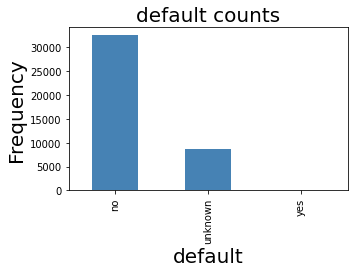

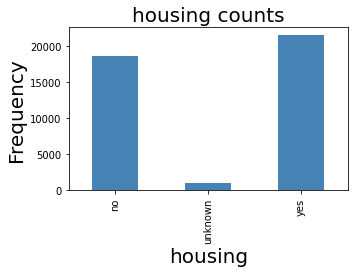

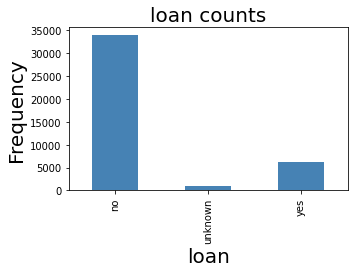

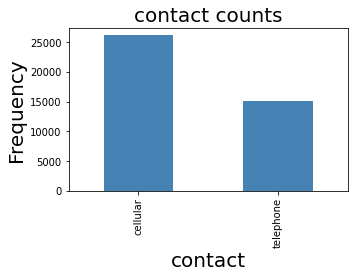

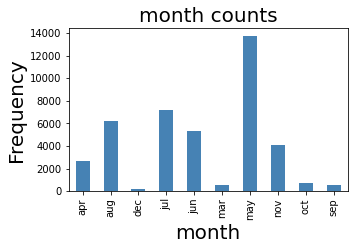

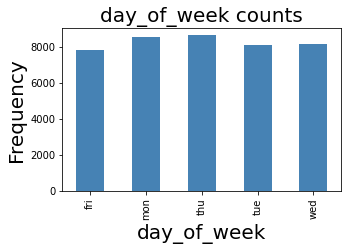

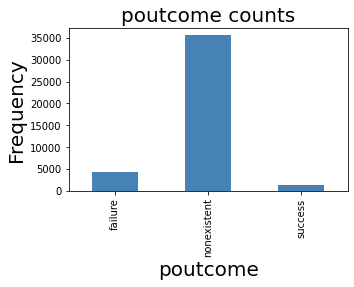

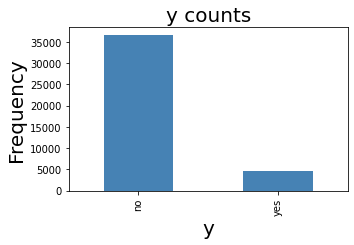

In [ ]:
# plotting graphs for all categorical columns
for col in return_categorical(df):
    counts = df[col].value_counts().sort_index()
    if len(counts) > 10:
      fig = plt.figure(figsize=(5, 3))
    else:
      fig = plt.figure(figsize=(5, 3))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts',fontsize=20)
    ax.set_xlabel(col, fontsize=20) 
    ax.set_ylabel("Frequency", fontsize=20)
plt.show()

## Checking For Highly Correlated Columns

In [ ]:
corr = df.corr()
#corr_greater_than_75 = corr[corr>=.75]
corr_greater_than_75 = corr
corr_greater_than_75 


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


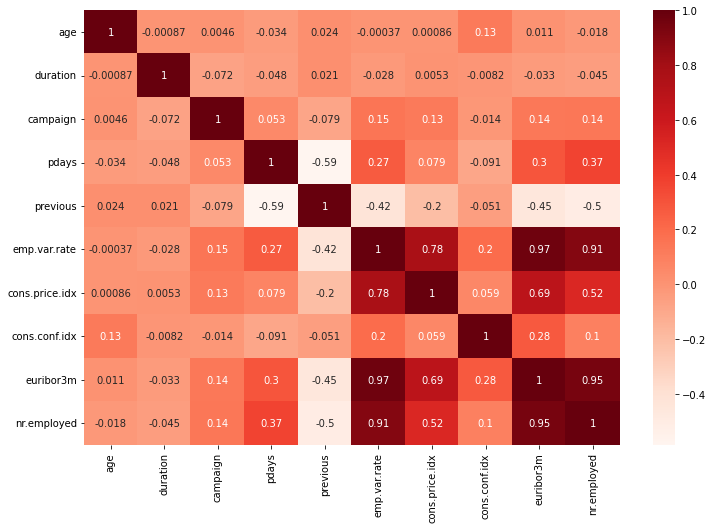

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_greater_than_75, cmap="Reds", annot = True);

==> Some correlation can be seen here between emp. var rate and nr.employed.

Also, euribor3m and emp.var rate.

## Checking Unique Values For Days Column

In [ ]:
df['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

## Modifying The Columns: Assigning Weight On the Basis Of Importance

In [ ]:
df['job'] = df['job'].apply(lambda x: -1 if x=='unknown' or x=='unemployed' else (15 if x=='entrepreneur' else (8 if x == 'blue-collar' else ( 6 if x=='technician' or x=='services' or  x=='admin.' or x=='management' else (4 if x== 'self-employed' or x=='student' else (2 if x=='housemaid' or x=='retired' else None) )))))
df['housing'] = df['housing'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
df['loan'] = df['loan'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
df['y'] = df['y'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
df['default'] = df['default'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
df['poutcome'] = df['poutcome'].apply(lambda x: 0 if x=='failure' else (2 if x=='failure' else -1))
df['pdays'] = df['pdays'].apply(lambda x: 0 if x==999 else(20 if x<=10 else(6 if x<=20 else 3)))

## Dropping Columns Which I Feel Won't Affect The Predictions

In [ ]:
df.drop(['day_of_week', 'contact', 'month'], axis=1, inplace = True)

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,2,married,basic.4y,0,0,0,261,1,0,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,6,married,high.school,-1,0,0,149,1,0,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,6,married,high.school,0,1,0,226,1,0,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,6,married,basic.6y,0,0,0,151,1,0,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,6,married,high.school,0,0,1,307,1,0,0,-1,1.1,93.994,-36.4,4.857,5191.0,0


## One Hot Encoding Remaining Categorical Features

In [ ]:
df  = pd.get_dummies(df, drop_first = True)

# Step 6: Divide Data to Training and Testing Data

In [ ]:
X = df.drop(labels="y", axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2021)

In [ ]:
y[y==1].count()

4640

In [ ]:
y[y==0].count()

36548

# Step 7: Balance data with Smote

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', len(X_train))
print('Resampled dataset shape', len(X_smote))

Original dataset shape 30891
Resampled dataset shape 54774


In [ ]:
y_smote[y_smote==1].count()

27387

In [ ]:
y_smote[y_smote==0].count()

27387

# Step 8: Normalization

In [ ]:
Scaler = StandardScaler()

In [ ]:
X_train.shape[1]

25

# Step 9: Modelling And Optimizing The Models

## K - NEAREST NEIGHBORS

### Modelling With KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(Scaler.fit_transform(X_train), y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
classifier(knn, Scaler.fit_transform(X_smote), Scaler.transform(X_test), y_smote,y_test)

Train accuracy is: 0.5878701573739366
Test accuracy is: 0.9005535592891133

Train ROC is: 0.5878701573739366
Test ROC is: 0.5828396382552493

F score is: 0.279887482419128
Precision is: 0.6958041958041958
Recall is: 0.17517605633802816


In [ ]:
error_rate = []
for i in range(1,20):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(Scaler.fit_transform(X_train), y_train)
 pred_i = knn.predict(Scaler.transform(X_test))
 error_rate.append(np.mean(pred_i != y_test))    

In [ ]:
acc = []
for i in range(1,20):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(Scaler.fit_transform(X_train), y_train)
    yhat = neigh.predict(Scaler.transform(X_test))
    acc.append(accuracy_score(y_test, yhat))

### Test with many case of K

Minimum error:- 0.09604739244440127 at K = 15


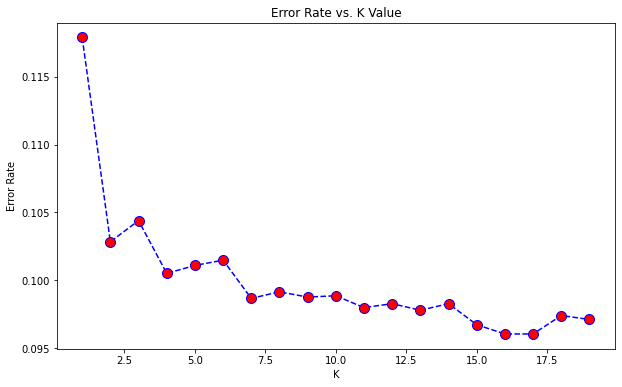

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.9039526075555987 at K = 15


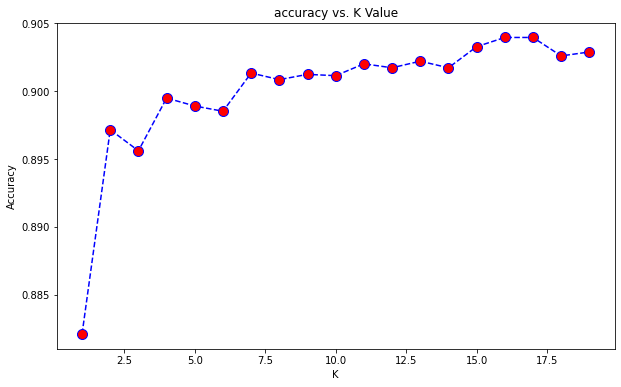

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

### Modelling Balance Data With The Value Of K which Gave Least Error

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit( Scaler.fit_transform(X_smote), y_smote)

classifier(knn, Scaler.fit_transform(X_smote),Scaler.transform(X_test),y_smote,y_test)

Train accuracy is: 0.9259502683755066
Test accuracy is: 0.8724871321744198

Train ROC is: 0.9259502683755066
Test ROC is: 0.7116518700676935

F score is: 0.46647704185290534
Precision is: 0.4332075471698113
Recall is: 0.5052816901408451


### Tuning The Hyperparameters Of KNN

In [ ]:
param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
              'weights': ["uniform", "distance"],
              'metric': ['euclidean', 'manhattan', 'minkowski']
             }

In [ ]:
grid_search(KNeighborsClassifier(), param_grid, Scaler.fit_transform(X_train),Scaler.transform(X_test),y_train,y_test)

Best parameters are:  {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}

Best estimator is:  KNeighborsClassifier(metric='euclidean', n_neighbors=15, weights='distance')

Scores and accuracies are:

Train accuracy is: 1.0
Test accuracy is: 0.9034670292318151

Train ROC is: 1.0
Test ROC is: 0.658890412664833

F score is: 0.4409448818897637
Precision is: 0.6105919003115264
Recall is: 0.34507042253521125


## DECISION TREE

### Model with Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)
classifier(dtree, X_train,X_test,y_train,y_test)

Train accuracy is: 1.0
Test accuracy is: 0.8877342915412256

Train ROC is: 1.0
Test ROC is: 0.7256186666994655

F score is: 0.5042881646655232
Precision is: 0.4916387959866221
Recall is: 0.5176056338028169


### Tuning The Hyperparameters Of Decision Tree

In [ ]:
param_grid = {'max_depth':np.arange(3,10),
              'min_samples_split': np.arange(3,10,1),
             'min_samples_leaf':np.arange(3,10),
              'min_samples_split' : np.arange(3,10),
              'criterion': ('gini', 'entropy')}



grid_search(DecisionTreeClassifier(random_state=0),param_grid, X_train,X_test,y_train,y_test)

Best parameters are:  {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 9, 'min_samples_split': 3}

Best estimator is:  DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=9,
                       min_samples_split=3, random_state=0)

Scores and accuracies are:

Train accuracy is: 0.9209154769997734
Test accuracy is: 0.9140526366902981

Train ROC is: 0.7590366029578077
Test ROC is: 0.7377106968302556

F score is: 0.5676599902296044
Precision is: 0.6377607025246982
Recall is: 0.511443661971831


## RANDOM FOREST

### Modelling With Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rforest = RandomForestClassifier(random_state=0)
classifier(rforest.fit(X_train, y_train), X_train,X_test,y_train,y_test)

Train accuracy is: 0.9999676281117478
Test accuracy is: 0.9123045547246771

Train ROC is: 0.9998573059360731
Test ROC is: 0.7332582164749221

F score is: 0.558866634098681
Precision is: 0.6278814489571899
Recall is: 0.5035211267605634


### Tuning The HyperParameters Of Random Forest

In [ ]:
# Nhóm em lần lượt tìm các tham số vì RF chạy quá lâu
params = {'n_estimators' : [400],
              'max_depth' : np.arange(3,20,1),
        #      'min_samples_split' : [3,5,7,9],
        #      'min_samples_leaf' : [3,5,7,9],
        # 'max_features': ('sqrt', 'log2'), 'criterion': ('gini', 'entropy')
        }

grid_search(RandomForestClassifier(random_state=0),params, X_train,X_test,y_train,y_test)

Best parameters are:  {'max_depth': 14, 'n_estimators': 400}

Best estimator is:  RandomForestClassifier(max_depth=14, n_estimators=400, random_state=0)

Scores and accuracies are:

Train accuracy is: 0.9735845391861707
Test accuracy is: 0.9139555210255415

Train ROC is: 0.8950098686958265
Test ROC is: 0.7257037064654052

F score is: 0.553877139979859
Precision is: 0.6470588235294118
Recall is: 0.4841549295774648


## LOGISTIC REGRESSION

### Modelling With logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression().fit(Scaler.fit_transform(X_train), y_train)
classifier(LR, Scaler.fit_transform(X_train),Scaler.transform(X_test),y_train,y_test)

Train accuracy is: 0.9085494156874171
Test accuracy is: 0.9108478197533262

Train ROC is: 0.6836220164451587
Test ROC is: 0.6834731989250205

F score is: 0.4922566371681416
Precision is: 0.6622023809523809
Recall is: 0.39172535211267606


### Tuning the HyperParameters of Logistic Regression

In [ ]:
params = {
'penalty' : ['l1', 'l2'],
'C' : [0.0001, 0.001, 0.01, 0.1], 
'class_weight' : [{1:0.5, 0:0.5}, {1:0.3, 0:0.7}, {1:0.7, 0:0.3},{1:0.4, 0:0.6}, {1:0.6, 0:0.4}],
}


In [ ]:
grid_search(LR, params, Scaler.fit_transform(X_train),Scaler.transform(X_test),y_train,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

Best parameters are:  {'C': 0.1, 'class_weight': {1: 0.6, 0: 0.4}, 'penalty': 'l2'}

Best estimator is:  LogisticRegression(C=0.1, class_weight={0: 0.4, 1: 0.6})

Scores and accuracies are:

Train accuracy is: 0.910556472759056
Test accuracy is: 0.908808390793435

Train ROC is: 0.7312934631519503
Test ROC is: 0.7193409543056836

F score is: 0.5353785254824344
Precision is: 0.6112994350282486
Recall is: 0.4762323943661972


## SVM

### Modelling With SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()
classifier(svc.fit(X_train, y_train), X_train,X_test,y_train,y_test)

Train accuracy is: 0.8895471172833511
Test accuracy is: 0.8917160337962513

Train ROC is: 0.5266915115960926
Test ROC is: 0.5211953689169182

F score is: 0.08531583264971287
Precision is: 0.6265060240963856
Recall is: 0.045774647887323945


### Tuning the HyperParameters of SVM

In [ ]:
param_grid = {'C': [10, 20],
              'gamma': [0.1, 0.01],
              'kernel': ['rbf','linear']}

In [ ]:
grid_search(svc, param_grid, X_train,X_test,y_train,y_test)

Best parameters are:  {'C': 20, 'gamma': 0.1, 'kernel': 'linear'}

Best estimator is:  SVC(C=20, gamma=0.1, kernel='linear')

Scores and accuracies are:

Train accuracy is: 0.9015570878249328
Test accuracy is: 0.904243954549869

Train ROC is: 0.64844479570099
Test ROC is: 0.6481457583510011

F score is: 0.4240654205607477
Precision is: 0.6302083333333334
Recall is: 0.31954225352112675


## Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

### KNN

In [ ]:
# bagging classifier
model = BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors = 15),
                          n_estimators = 15)
classifier(model.fit(Scaler.fit_transform(X_smote), y_smote), Scaler.fit_transform(X_smote),Scaler.transform(X_test),y_smote,y_test)

Train accuracy is: 0.9264797166538868
Test accuracy is: 0.8738467514810139

Train ROC is: 0.9264797166538867
Test ROC is: 0.7147293486934048

F score is: 0.47173647824318826
Precision is: 0.4383975812547241
Recall is: 0.5105633802816901


### Decision Tree

In [ ]:
# bagging classifier
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(min_samples_split=20, min_samples_leaf=9, max_depth=7, criterion='entropy'),n_estimators = 500,)

classifier(model.fit(X_train, y_train), X_train,X_test,y_train,y_test)

Train accuracy is: 0.9245411284840245
Test accuracy is: 0.9162862969797029

Train ROC is: 0.7862176885243523
Test ROC is: 0.7586296624853366

F score is: 0.5945437441204139
Precision is: 0.6383838383838384
Recall is: 0.5563380281690141
